In [5]:
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [14]:
path = "../data/Resultados_plebiscito_nacional_2020/Resultados-Plebiscito-Constitucion-Politica-2020.xlsx"


df = pd.read_excel(path)
    

In [40]:
df

,Nro. Región,Region,Provincia,Circ.Senatorial,Distrito,Comuna,Circ.Electoral,Local,Mesa,Tipo mesa,Mesas Fusionadas,Electores,Nro.voto,Opción Constitución Política,Votos TRICEL
0,1.0,DE TARAPACA,IQUIQUE,Circ. Senatorial 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,18.0,M,18M,344.0,1.0,APRUEBO,139.0
1,1.0,DE TARAPACA,IQUIQUE,Circ. Senatorial 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,18.0,M,18M,344.0,2.0,RECHAZO,34.0
2,1.0,DE TARAPACA,IQUIQUE,Circ. Senatorial 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,18.0,M,18M,344.0,900.0,VOTOS NULOS,1.0
3,1.0,DE TARAPACA,IQUIQUE,Circ. Senatorial 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,18.0,M,18M,344.0,901.0,VOTOS EN BLANCO,0.0
4,1.0,DE TARAPACA,IQUIQUE,Circ. Senatorial 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,19.0,M,19M,343.0,1.0,APRUEBO,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178785,16.0,DE ÑUBLE,DIGUILLIN,Circ. Senatorial 16,DISTRITO 19,YUNGAY,YUNGAY,LICEO DE YUNGAY,9.0,M,9M,333.0,2.0,RECHAZO,39.0
178786,16.0,DE ÑUBLE,DIGUILLIN,Circ. Senatorial 16,DISTRITO 19,YUNGAY,YUNGAY,LICEO DE YUNGAY,9.0,M,9M,333.0,900.0,VOTOS NULOS,2.0
178787,16.0,DE ÑUBLE,DIGUILLIN,Circ. Senatorial 16,DISTRITO 19,YUNGAY,YUNGAY,LICEO DE YUNGAY,9.0,M,9M,333.0,901.0,VOTOS EN BLANCO,0.0
178788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


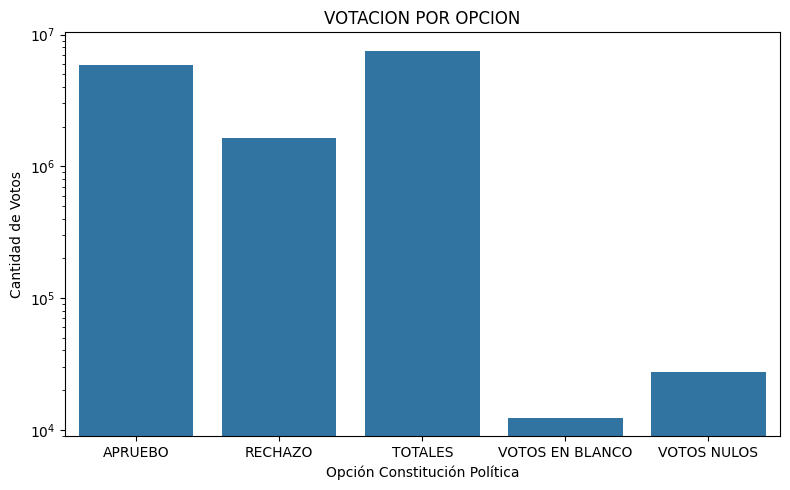

In [39]:

categorias = ["APRUEBO", "RECHAZO", "VOTOS EN BLANCO", "VOTOS NULOS"]
resumen = df.groupby("Opción Constitución Política")["Votos TRICEL"].sum().reset_index()
resultados_filtrados = resumen[resumen["Opción Constitución Política"].isin(categorias)]
#Grafico de los votos 
plt.figure(figsize=(8, 5))
sns.barplot(x="Opción Constitución Política", y= "Votos TRICEL", data= resumen)
plt.yscale("log")
plt.title("VOTACION POR OPCION")
plt.ylabel("Cantidad de Votos")
plt.tight_layout()
plt.show()


C:\Users\nicom\AppData\Local\Temp\ipykernel_11184\2045118550.py:8: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  apruebo.plot(column='Votos TRICEL', cmap='Blues', legend=True)


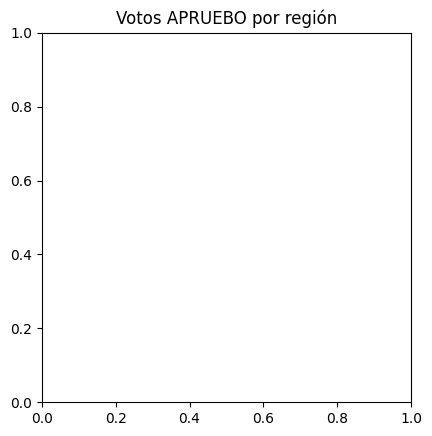

In [ ]:
ruta = "../data/Regiones/Regional.shp"
df.rename(columns={'Región': 'Region'}, inplace=True)
df['Region'] = df['Region'].str.strip().str.upper()
resumen_regional = df.groupby(["Region", "Opción Constitución Política"])["Votos TRICEL"].sum().reset_index()
regiones = gpd.read_file(ruta)
mapa = regiones.merge(resumen_regional, on="Region")
apruebo = mapa[mapa['Opción Constitución Política'] == '  APRUEBO']
apruebo.plot(column='Votos TRICEL', cmap='Blues', legend=True)
plt.title('Votos APRUEBO por región')
plt.show()
